<a href="https://colab.research.google.com/github/AkshadPawar/oibsip_taskno_3/blob/main/Level_1_(3)_Cleaning_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/data Analist intership/AB_NYC_2019.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Inspect the dataset
print(df.info())  # Overview of columns and missing values
print(df.head())  # Preview the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)



Missing values in each column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# Impute missing values for 'name' and 'host_name' with 'Unknown'
df['name'] = df['name'].fillna('Unknown')
df['host_name'] = df['host_name'].fillna('Unknown')

# Impute missing values for 'last_review' and 'reviews_per_month' with 0
df['last_review'] = df['last_review'].fillna(0)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Check again for missing values after imputation
missing_values_after = df.isnull().sum()
print(missing_values_after)


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [ ]:
# Check for duplicates based on all columns
duplicates = df.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
df = df.drop_duplicates()

# Verify if any duplicates are left
duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates_after}")


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [ ]:
# Standardize the casing of categorical columns
categorical_columns = ['room_type', 'neighbourhood', 'neighbourhood_group', 'name', 'host_name']

for col in categorical_columns:
    df[col] = df[col].str.strip().str.lower()

# Check the first few rows to verify standardization
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean & quiet apt home by the park,2787,john,brooklyn,kensington,40.64749,-73.97237,private room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit midtown castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the village of harlem....new york !,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private room,150,3,0,0,0.00,1,365
3,3831,cozy entire floor of brownstone,4869,lisaroxanne,brooklyn,clinton hill,40.68514,-73.95976,entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire apt: spacious studio/loft by central park,7192,laura,manhattan,east harlem,40.79851,-73.94399,entire home/apt,80,10,9,2018-11-19,0.10,1,0


Outliers in price: 2972


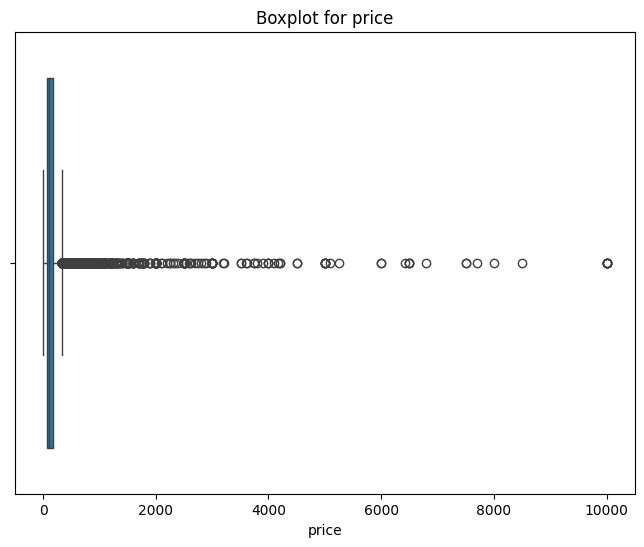

Outliers in minimum_nights: 6607


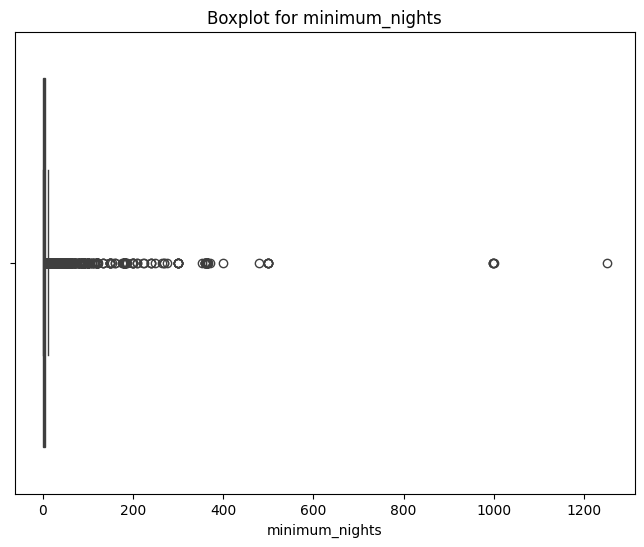

Outliers in reviews_per_month: 3312


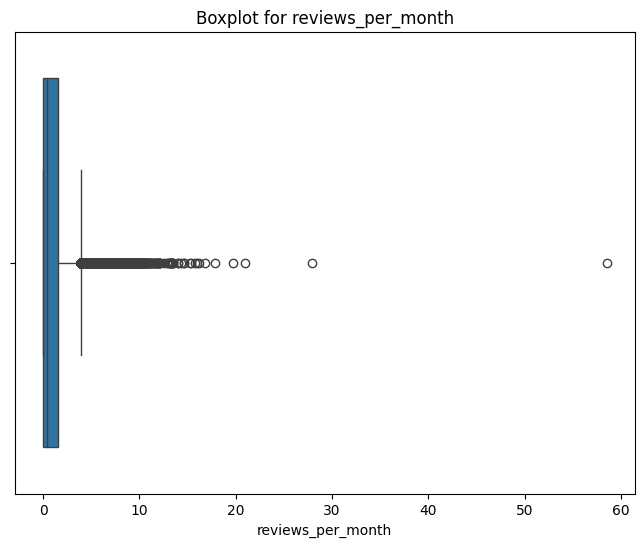

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in numerical columns and plot boxplots
numerical_columns = ['price', 'minimum_nights', 'reviews_per_month']

for col in numerical_columns:
    outliers = detect_outliers(df, col)
    print(f"Outliers in {col}: {len(outliers)}")

    # Plot the boxplot for each numerical column
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [ ]:
# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in numerical columns
numerical_columns = ['price', 'minimum_nights', 'reviews_per_month']

for col in numerical_columns:
    outliers = detect_outliers(df, col)
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in price: 2972
Outliers in minimum_nights: 6607
Outliers in reviews_per_month: 3312


In [ ]:
# Remove outliers based on IQR method
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows where the column values are outside the IQR range
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Verify the dataset size after removing outliers
print(f"Dataset size after removing outliers: {df.shape}")


Dataset size after removing outliers: (37817, 16)


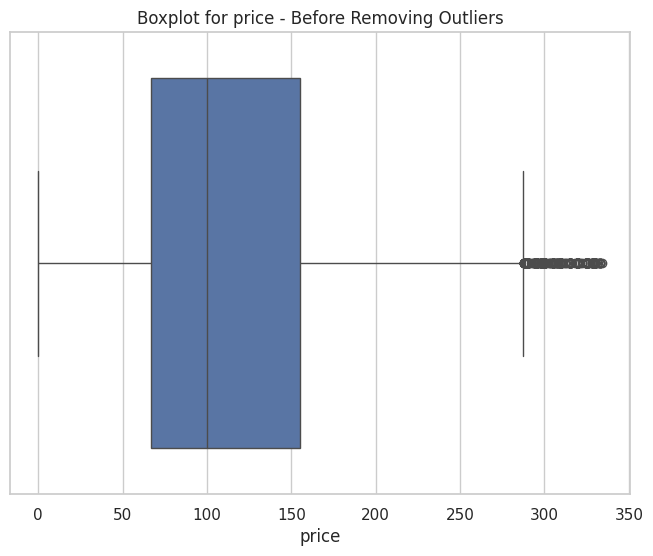

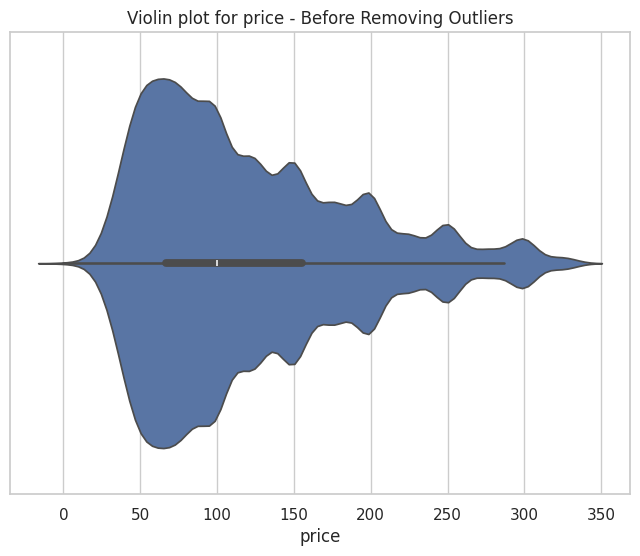

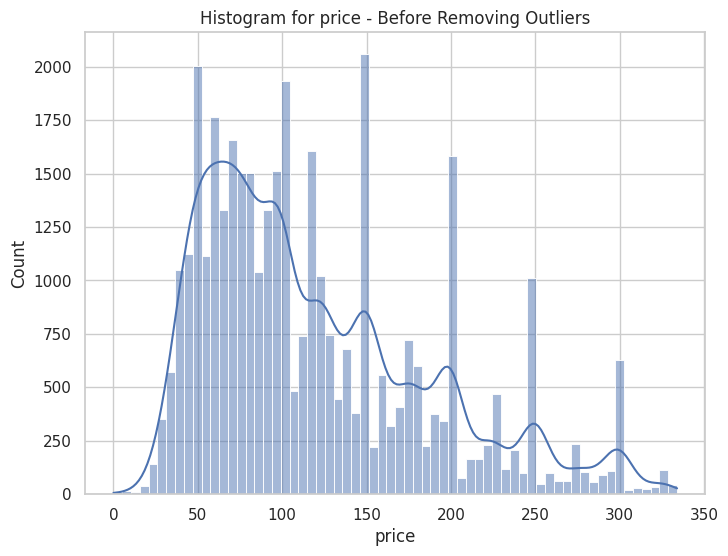

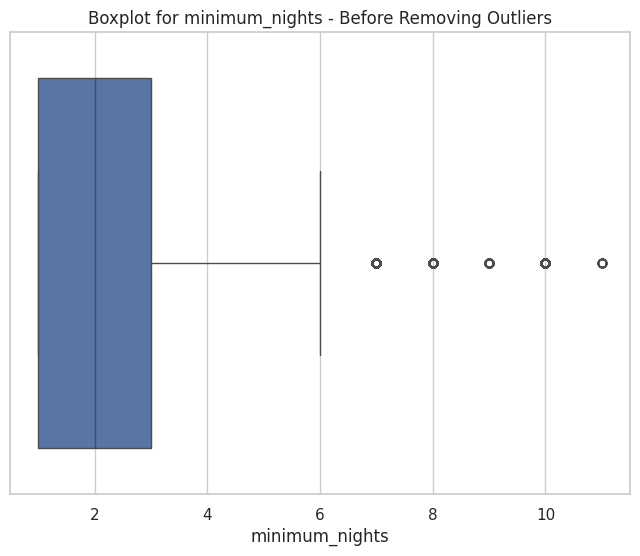

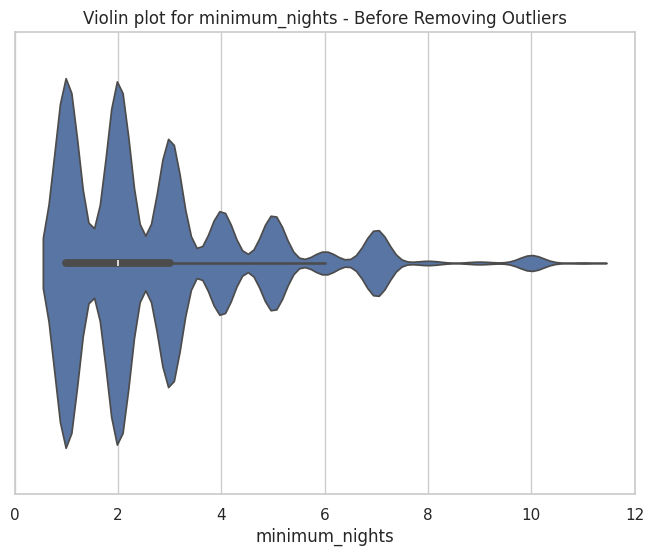

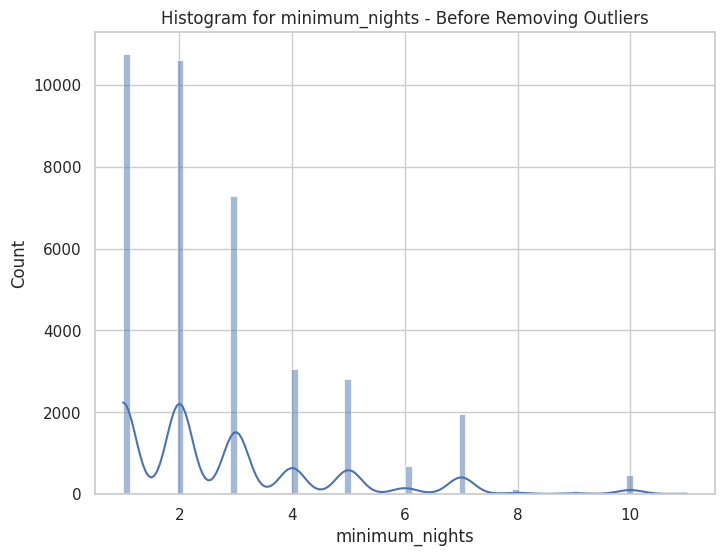

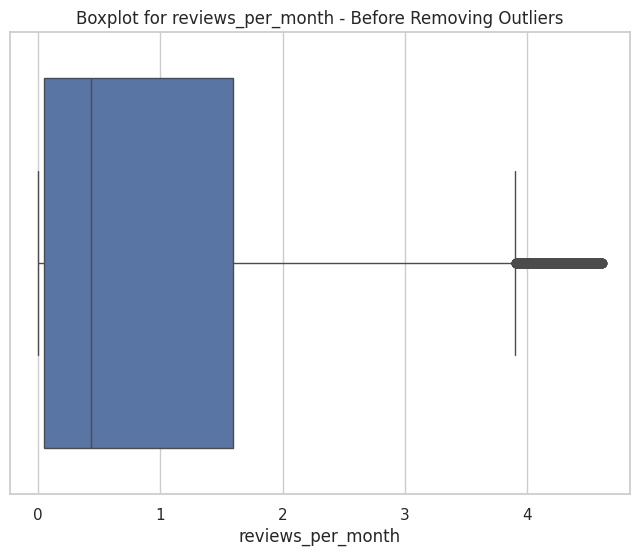

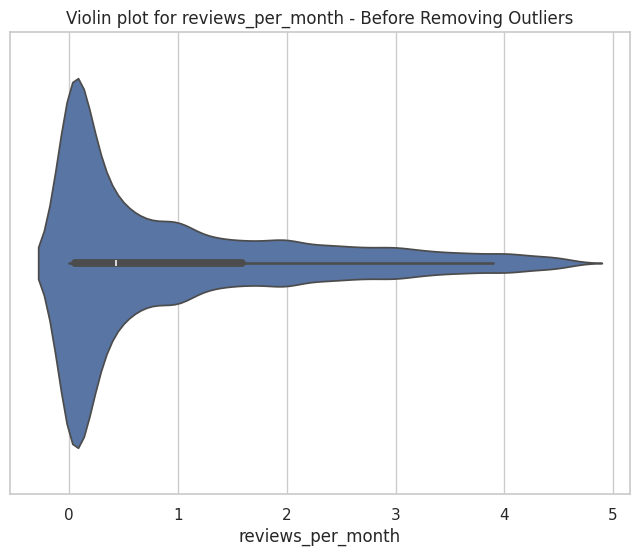

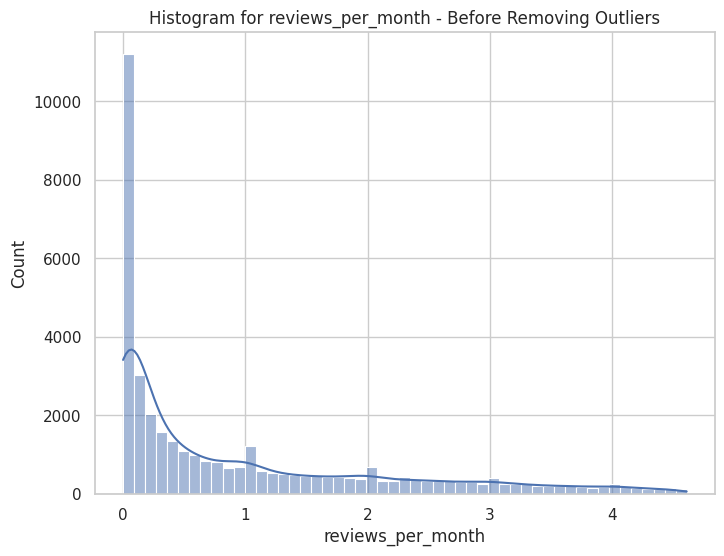

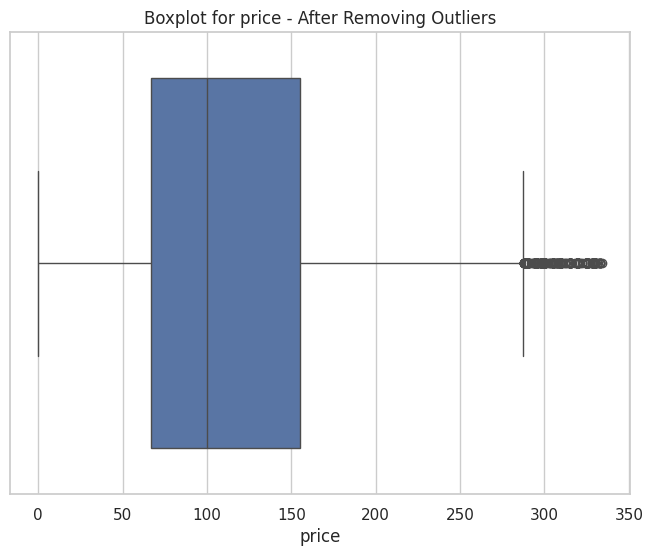

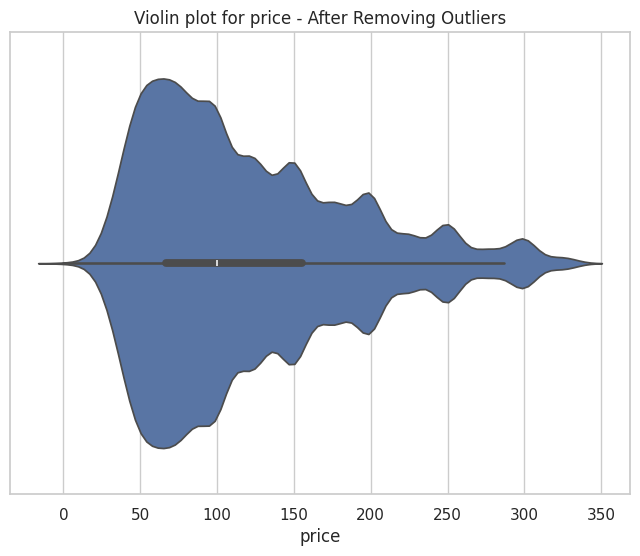

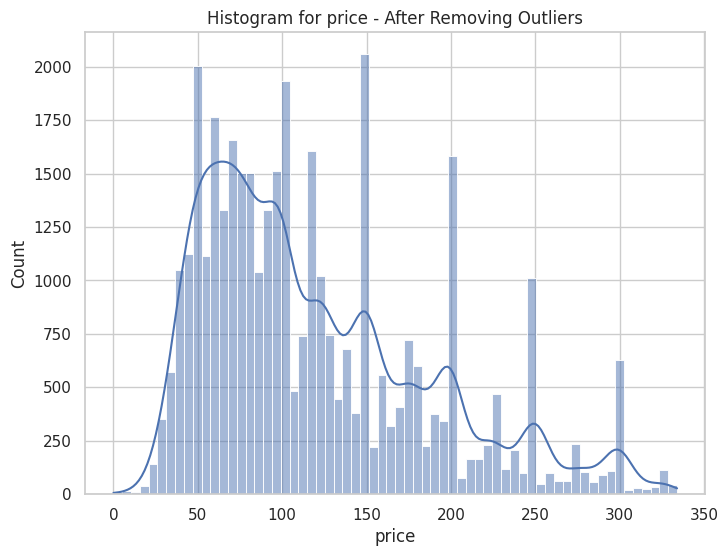

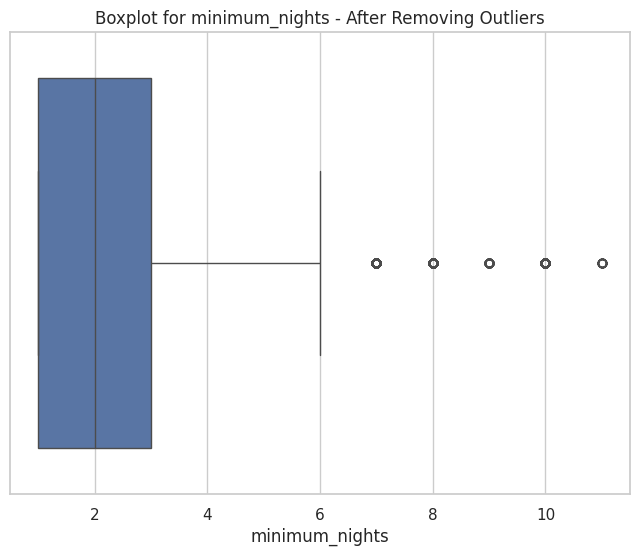

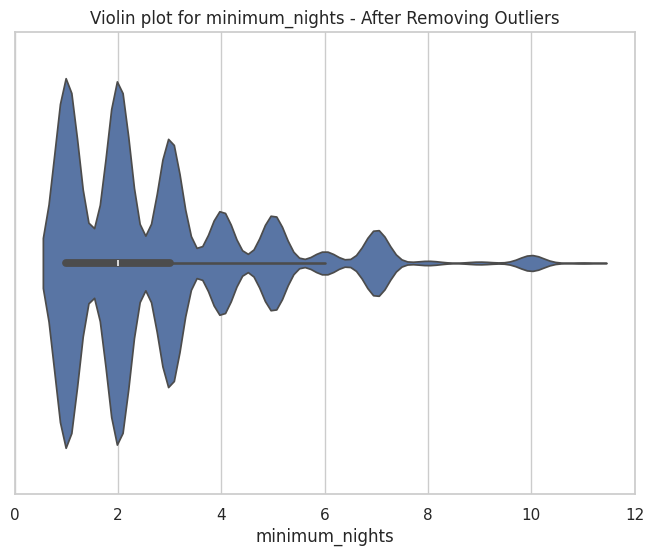

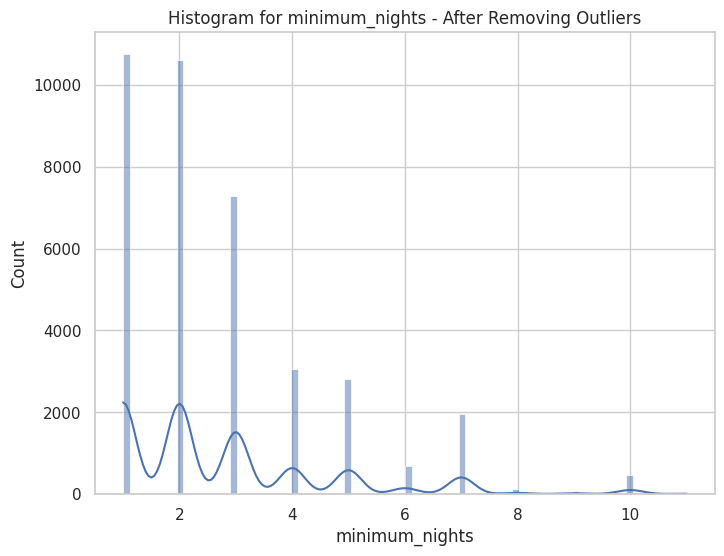

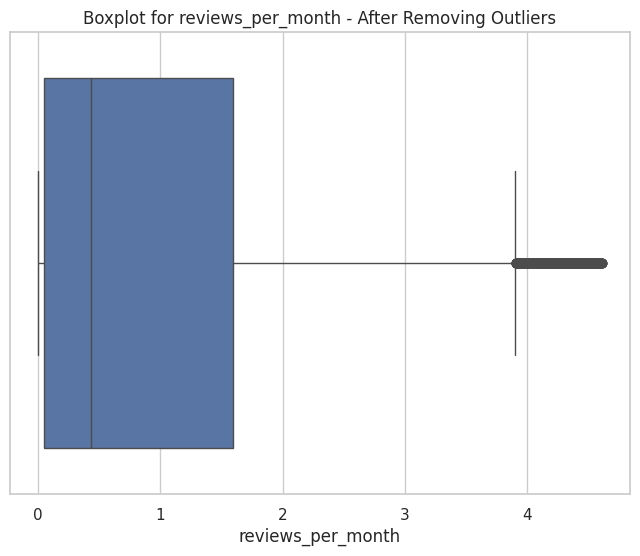

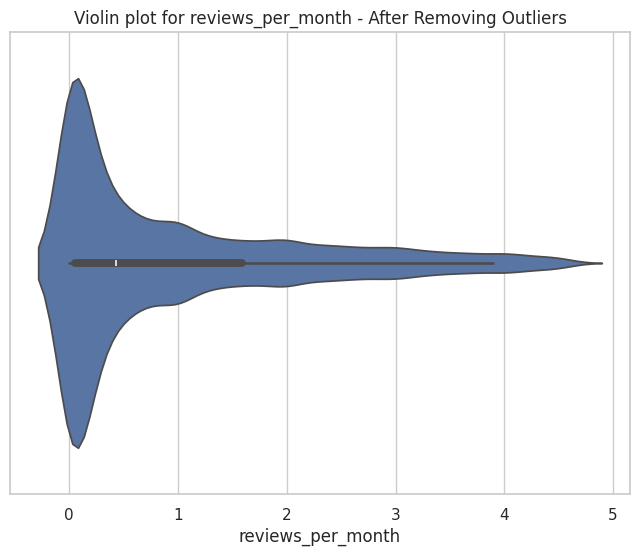

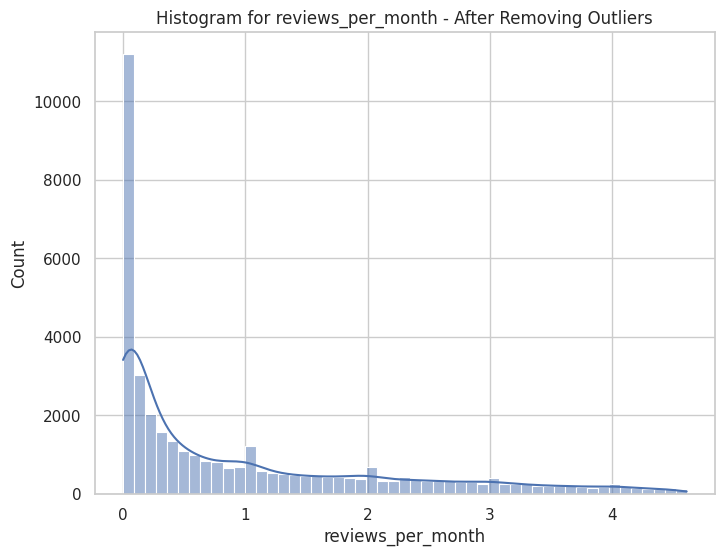

In [ ]:
# Set up the plot style
sns.set(style="whitegrid")

# Visualizing outliers with Boxplot, Violin plot, and Histogram
numerical_columns = ['price', 'minimum_nights', 'reviews_per_month']

# Before removing outliers
for col in numerical_columns:
    # Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col} - Before Removing Outliers')
    plt.show()

    # Violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=df[col])
    plt.title(f'Violin plot for {col} - Before Removing Outliers')
    plt.show()

    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram for {col} - Before Removing Outliers')
    plt.show()

# After removing outliers (Visualizing the same plots)
for col in numerical_columns:
    # Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col} - After Removing Outliers')
    plt.show()

    # Violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=df[col])
    plt.title(f'Violin plot for {col} - After Removing Outliers')
    plt.show()

    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram for {col} - After Removing Outliers')
    plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the numerical columns to scale
numerical_columns = ['price', 'minimum_nights', 'reviews_per_month']

# Apply MinMax scaling
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the first few rows to verify scaling
df.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean & quiet apt home by the park,2787,john,brooklyn,kensington,40.64749,-73.97237,private room,0.446108,0.0,9,2018-10-19,0.045553,6,365
1,2595,skylit midtown castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,0.673653,0.0,45,2019-05-21,0.082430,2,355
2,3647,the village of harlem....new york !,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private room,0.449102,0.2,0,0,0.000000,1,365
4,5022,entire apt: spacious studio/loft by central park,7192,laura,manhattan,east harlem,40.79851,-73.94399,entire home/apt,0.239521,0.9,9,2018-11-19,0.021692,1,0
5,5099,large cozy 1 br apartment in midtown east,7322,chris,manhattan,murray hill,40.74767,-73.97500,entire home/apt,0.598802,0.2,74,2019-06-22,0.127983,1,129


In [ ]:
# Check for data types to ensure all columns have appropriate types
print(df.dtypes)

# Check for any remaining missing values
print("Missing values after all transformations:", df.isnull().sum())

# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)

print("Cleaned data saved as 'cleaned_dataset.csv'")


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
Missing values after all transformations: id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude           